In [5]:
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures


from skimage import measure

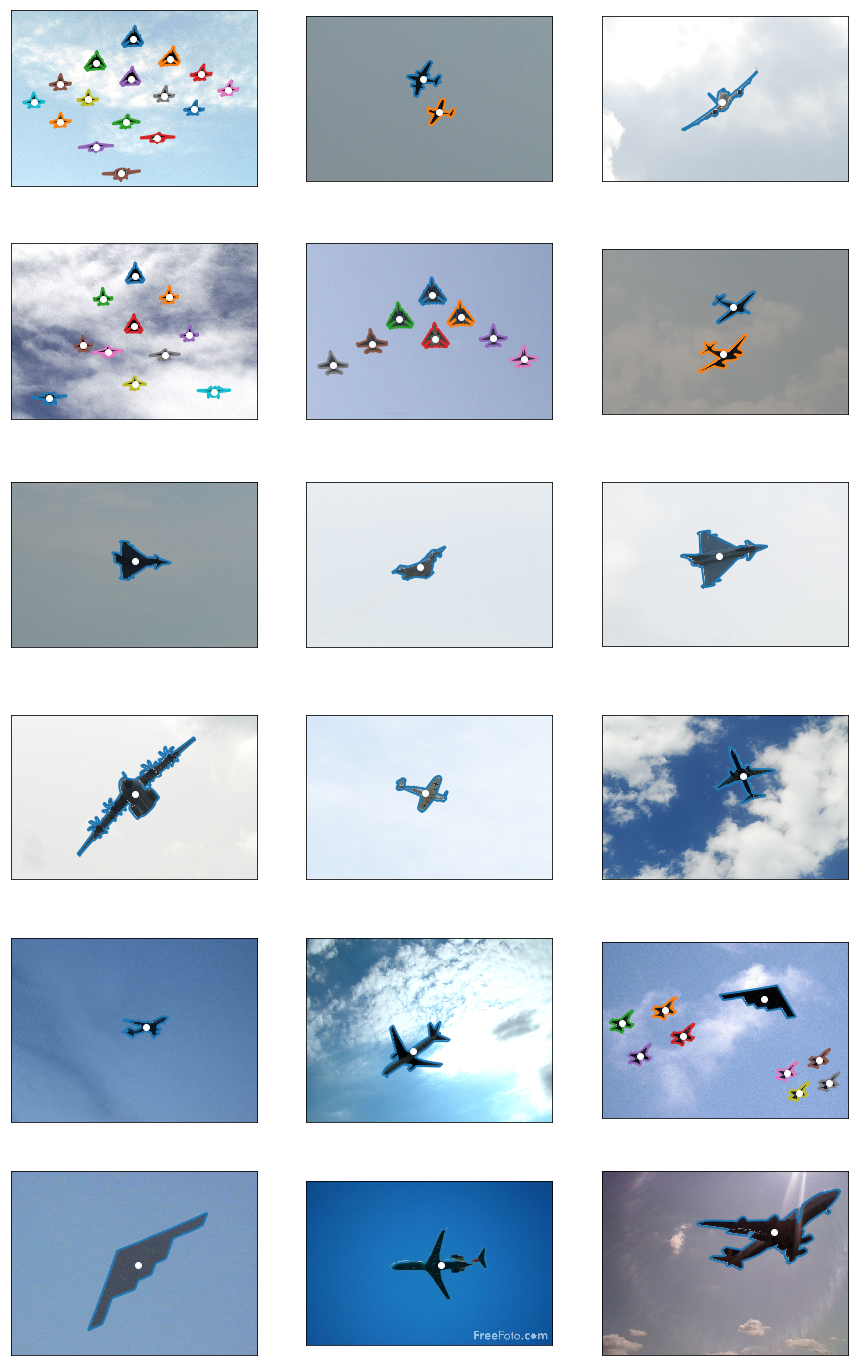

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

fig, ax = plt.subplots(6, 3, figsize = (15, 25))

samoloty = []
for i in range(21):
    if i < 10:
        napis = 'samolot0' + str(i) + '.jpg'
    else:
        napis = 'samolot' + str(i) + '.jpg'
    samoloty.append(napis)

samoloty.remove('samolot04.jpg')
samoloty.remove('samolot06.jpg')
samoloty.remove('samolot19.jpg')

for i in range(len(samoloty)):

    img = data.imread(samoloty[i])
    img2 = data.imread(samoloty[i])
    tmp = rgb2hsv(img)
    for a in range(len(tmp)):
        for b in range(len(tmp[0])):
            if tmp[a, b, 0] > 0.4 and tmp[a, b, 0] < 0.75:
                tmp[a, b, 1] = 0

    tmp = hsv2rgb(tmp)
    img = rgb2gray(tmp)

    r = img
    perc = 0.6
    MIN = np.percentile(img, perc)
    MAX = np.percentile(img, 100-perc)
    norm = img
    norm = (img - MIN) / (MAX - MIN)
    norm[norm[:,:] > 1] = 1
    norm[norm[:,:] < 0] = 0
    norm[norm[:,:] > 0.5] = 1
    r = norm
    r = r**0.39
    r = mp.erosion(r)
    r = mp.erosion(r)
    contours = measure.find_contours(r, 0.7)
    ax[i//3][i%3].imshow(img2, interpolation='nearest', cmap=plt.cm.gray) #r lub img zamiast img2
    ax[i//3][i%3].axis('image')
    ax[i//3][i%3].set_xticks([])
    ax[i//3][i%3].set_yticks([])

    for n, contour in enumerate(contours):
        if shape(contour)[0] > 300:
            ax[i//3][i%3].plot(contour[:, 1], contour[:, 0], linewidth=2)
            
            from skimage.draw import polygon
            wielokat = np.zeros(shape(r), dtype=np.uint8)
            rr, cc = polygon(contour[:, 0], contour[:, 1])
            wielokat[rr, cc] = 1

            from skimage import data, util
            from skimage.measure import label
            import skimage.measure as miara

            label_img = label(wielokat, connectivity=wielokat.ndim)
            props = miara.regionprops(label_img)

            srodek = props[0].centroid
            ax[i//3][i%3].plot(srodek[1], srodek[0], 'wo')


plt.show()
